In [ ]:
!pip install praw

In [1]:
#approach from link = 'https://towardsdatascience.com/using-nlp-to-figure-out-what-people-really-think-e1d10d98e491'

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from collections import Counter
import praw
import json

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
import string
import nltk
from nltk.corpus import stopwords

import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from collections import Counter


import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from collections import Counter
import json
import pandas as pd
import numpy as np
import time
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")
nltk.download('wordnet')



# Initialize NLTK stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#approach from link = 'https://towardsdatascience.com/using-nlp-to-figure-out-what-people-really-think-e1d10d98e491'

import re
import string
import nltk
from nltk.corpus import stopwords

# Initialize NLTK stopwords
sw = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub('\n', '', text)

    # Tokenize the data
    text = nltk.word_tokenize(text)
    
    # Remove stopwords
    text = [w for w in text if w not in sw]
    
    # Concatenate the cleaned words back into a single string
    cleaned_text = ' '.join(text)
    
    return cleaned_text


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Determine the part of speech (POS) for each word
    pos_tags = nltk.pos_tag(words)
    
    # Map POS tags to WordNet POS tags for lemmatization
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # Default to noun
    
    # Lemmatize each word based on its POS
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text


# Define a function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return words

In [3]:
reddit = praw.Reddit(
    client_id='AOejqB0AijXPq731UrOfMQ',
    client_secret='gUSic3blbhi5aqpFF8_3dBUxHVFJUw',
    user_agent='EducationResearchPurdue',
)

In [4]:
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint,
        credential=ta_credential)
    return text_analytics_client

def analyze_sentiments(descriptions):
    client = authenticate_client()
    sentiments = []

    requests_per_second_limit = 100
    requests_per_minute_limit = 300
    txt_number = 0
    time_counter = time.time()

    for txt in descriptions:
        txt_number += 1
        #print(f"Processing description {txt_number}...")

        # Detect Sentiments
        response = client.analyze_sentiment(documents=[txt])[0]
        if not response.is_error:
            sentiments.append(response.sentiment)
        else:
            print(f"Error processing description {txt_number}: {response.id}, {response.error}")

        end_time = time.time()

        requests_in_this_second = txt_number % requests_per_second_limit
        requests_in_this_minute = txt_number % requests_per_minute_limit

        # If we reach the limit of requests per second, add a delay to maintain the limit
        if requests_in_this_second == 0:
            time_taken_for_batch = end_time - time_counter
            if time_taken_for_batch < 1:
                time.sleep(1 - time_taken_for_batch)
            time_counter = time.time()

        if requests_in_this_minute == 0:
            time_taken_for_minute = end_time - time_counter
            if time_taken_for_minute < 60:
                time.sleep(60 - time_taken_for_minute)
            time_counter = time.time()

    return sentiments

# Priyanka's Azure credemtials
key = 'ab9393a8b85842ae91003bdd8ce1b28f'
endpoint = 'https://workspace.cognitiveservices.azure.com/'

In [5]:
subreddit_name = "femalefashionadvice"
num_posts = 200

# Access the subreddit
subreddit = reddit.subreddit(subreddit_name)

### Looking for instances where the word 'Old navy' is used in all the posts of the subreddit

In [6]:
post_data = []

# Iterate through the posts
for submission in subreddit.search('Old navy', sort='all', time_filter='all', limit=num_posts):
    post_titles = submission.title
    post_desc = submission.selftext
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
      
    # Append data for this post to the list
    post_data.append([post_titles, post_desc, comments])


df = pd.DataFrame(post_data, columns=['title', 'description', 'comments'])
df['combined'] = df['title'] + ' ' + df['description']

def read_scores(sent_file):
    with open(sent_file) as f:
        return {line.split('\t')[0]: int(line.split('\t')[1]) for line in f}

Scores_Table = read_scores('Files_Directory/Twitter/AFINN-111.txt')

scores_new_posts = []
reddit_posts = df['combined'].to_list()

for txt in reddit_posts:
    count = 0;
    for score in Scores_Table:
         string = json.dumps(txt).lower()
         word_score = string.count(score) * Scores_Table[score]
         count = count + word_score
    scores_new_posts.append(count)

In [7]:
sentiments = analyze_sentiments(reddit_posts)

value_counts_only = Counter(sentiments)

# Iterate through the Counter object and print in the desired format
for value, count in value_counts_only.items():
    print(f"{value} : {count}")

Error processing description 20: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 100: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 102: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 138: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large t

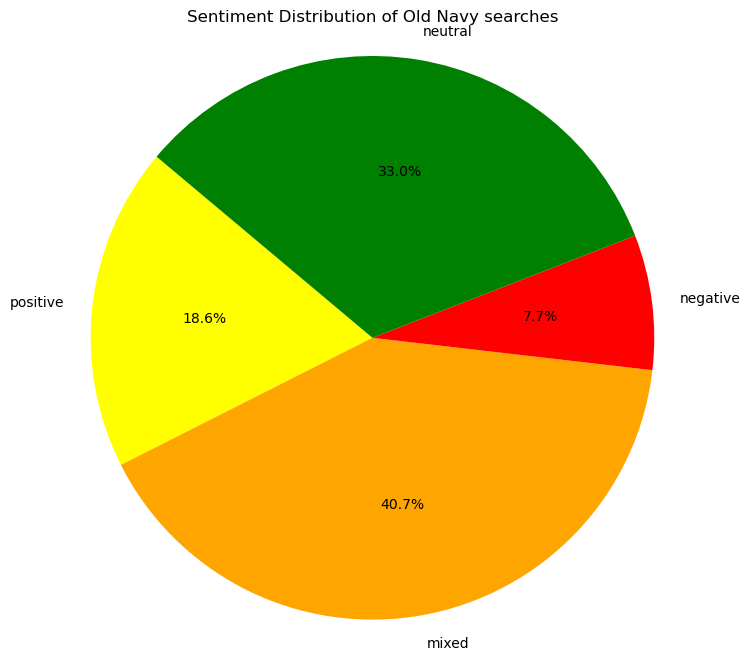

In [8]:
# Define colors for each sentiment
colors = ['yellow', 'orange', 'red', 'green']

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(value_counts_only.values(), labels=value_counts_only.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution of Old Navy searches')  # Set the title

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


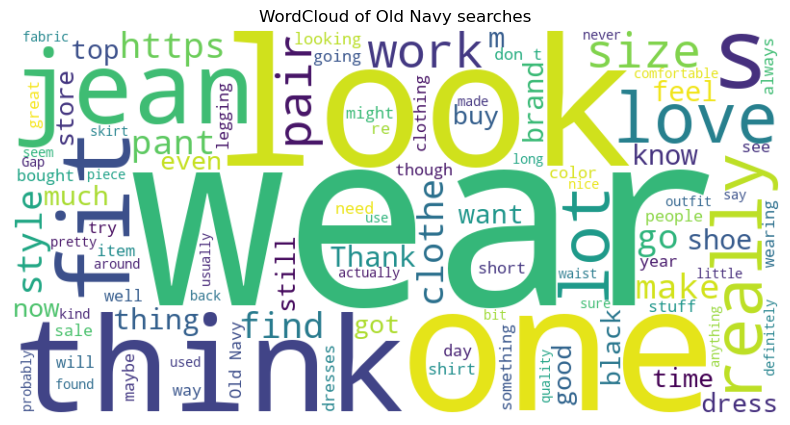

In [9]:
# Convert any non-string elements in 'comments' column to strings
df['comments'] = df['comments'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Concatenate 'title,' 'description,' and 'comments' columns into one
df['combined'] = df['title'] + ' ' + df['description'] + ' ' + df['comments']

text_combined = ''
# Combine all the text into a single string
text_combined = ' '.join(df['combined'])

# Initialize the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_combined)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Old Navy searches')
plt.show()

### Looking for instances where the word 'Gap' is used in all the posts of the subreddit

In [10]:
post_data = []

# Iterate through the posts
for submission in subreddit.search('GAP ', sort='all', time_filter='all', limit=num_posts):
    post_titles = submission.title
    post_desc = submission.selftext
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
      
    # Append data for this post to the list
    post_data.append([post_titles, post_desc, comments])

df_gap = pd.DataFrame(post_data, columns=['title', 'description', 'comments'])
df_gap['combined'] = df_gap['title'] + ' ' + df_gap['description']

def read_scores(sent_file):
    with open(sent_file) as f:
        return {line.split('\t')[0]: int(line.split('\t')[1]) for line in f}

Scores_Table = read_scores('Files_Directory/Twitter/AFINN-111.txt')

In [11]:
scores_new_posts_gap = []
reddit_posts_gap = df_gap['combined'] .to_list()

for txt in reddit_posts:
    count = 0;
    for score in Scores_Table:
         string = json.dumps(txt).lower()
         word_score = string.count(score) * Scores_Table[score]
         count = count + word_score
    scores_new_posts_gap.append(count)

In [12]:
sentiments_gap = analyze_sentiments(reddit_posts_gap)

value_counts_only = Counter(sentiments_gap)

# Iterate through the Counter object and print in the desired format
for value, count in value_counts_only.items():
    print(f"{value} : {count}")

Error processing description 2: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 137: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 162: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 166: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to

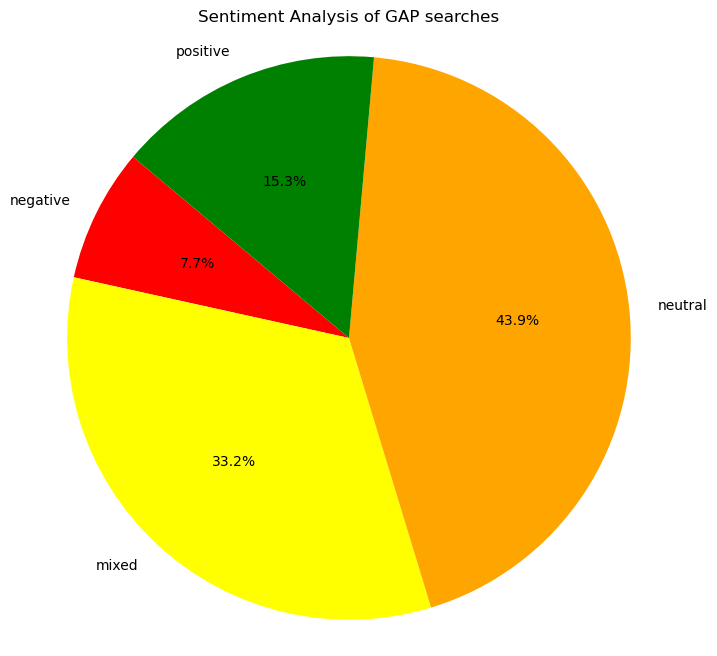

In [13]:
# Define colors for each sentiment
colors = ['red', 'yellow', 'orange', 'green']

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(value_counts_only.values(), labels=value_counts_only.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Analysis of GAP searches')  # Set the title

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

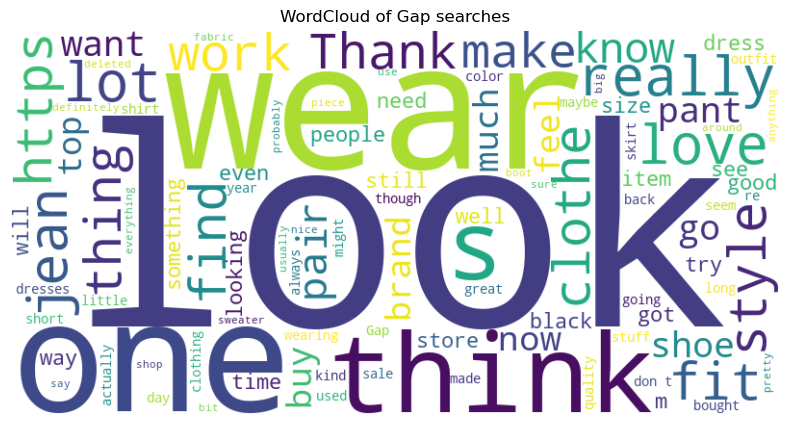

In [14]:
# Convert any non-string elements in 'comments' column to strings
df_gap['comments'] = df_gap['comments'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Concatenate 'title,' 'description,' and 'comments' columns into one
df_gap['combined'] = df_gap['title'] + ' ' + df_gap['description'] + ' ' + df_gap['comments']

text_combined = ''
# Combine all the text into a single string
text_combined = ' '.join(df_gap['combined'])

# Initialize the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_combined)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Gap searches')
plt.show()

### Looking for instances where the word 'Banana Republic' is used in all the posts of the subreddit

In [15]:
post_data = []

# Iterate through the posts
for submission in subreddit.search('Banana Republic', sort='all', time_filter='all', limit=num_posts):
    post_titles = submission.title
    post_desc = submission.selftext
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
      
    # Append data for this post to the list
    post_data.append([post_titles, post_desc, comments])


df_br = pd.DataFrame(post_data, columns=['title', 'description', 'comments'])
df_br['combined'] = df_br['title'] + ' ' + df_br['description']

def read_scores(sent_file):
    with open(sent_file) as f:
        return {line.split('\t')[0]: int(line.split('\t')[1]) for line in f}

Scores_Table = read_scores('Files_Directory/Twitter/AFINN-111.txt')

scores_new_posts = []
reddit_posts = df_br['combined'] .to_list()

for txt in reddit_posts:
    count = 0;
    for score in Scores_Table:
         string = json.dumps(txt).lower()
         word_score = string.count(score) * Scores_Table[score]
         count = count + word_score
    scores_new_posts.append(count)

sentiments = analyze_sentiments(reddit_posts)

value_counts_only = Counter(sentiments)

# Iterate through the Counter object and print in the desired format
for value, count in value_counts_only.items():
    print(f"{value} : {count}")

Error processing description 53: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
Error processing description 194: 0, {'code': 'InvalidDocument', 'message': 'A document within the request was too large to be processed. Limit document size to: 5120 text elements. For additional details on the data limitations see https://aka.ms/text-analytics-data-limits', 'target': None}
mixed : 100
positive : 33
negative : 16
neutral : 49


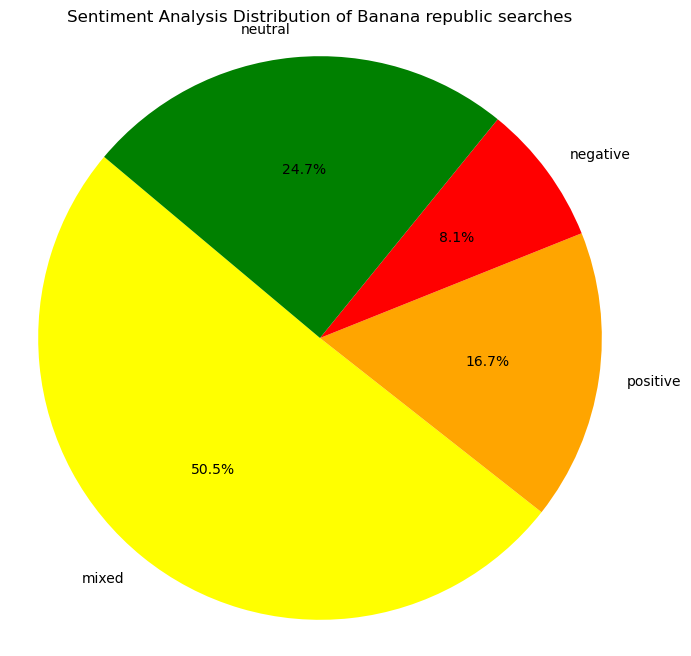

In [16]:
# Define colors for each sentiment
colors = ['yellow', 'orange', 'red', 'green']

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(value_counts_only.values(), labels=value_counts_only.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Analysis Distribution of Banana republic searches')  # Set the title

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

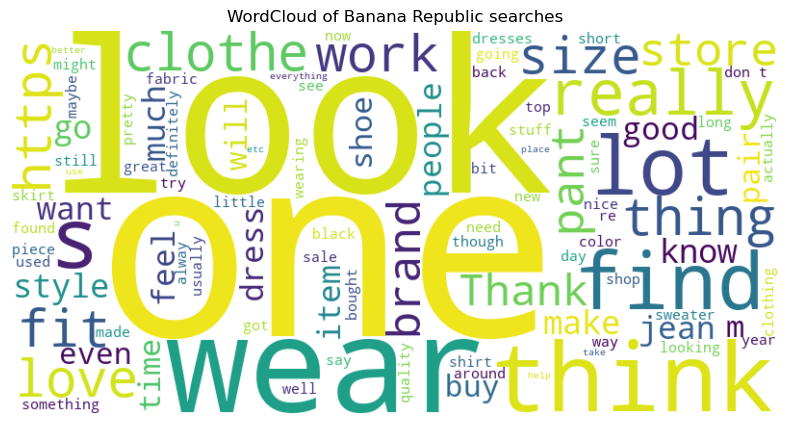

In [17]:
# Convert any non-string elements in 'comments' column to strings
df_br['comments'] = df_br['comments'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Concatenate 'title,' 'description,' and 'comments' columns into one
df_br['combined'] = df_br['title'] + ' ' + df_br['description'] + ' ' + df_br['comments']

text_combined = ''

# Combine all the text into a single string
text_combined = ' '.join(df_br['combined'])

# Initialize the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_combined)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Banana Republic searches')
plt.show()